# Feature Engineering

## Dataset information

The Avila data set has been extracted from 800 images of the the "Avila Bible", a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain.  
The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

The prediction task consists in associating each pattern to one of the 12 copyists (labeled as: A, B, C, D, E, F, G, H, I, W, X, Y).
The data have has been normalized, by using the Z-normalization method, and divided in two data sets: a training set containing 10430 samples, and a test set  containing the 10437 samples.

Class distribution (training set)
- A: 4286
- B: 5  
- C: 103 
- D: 352 
- E: 1095 
- F: 1961 
- G: 446 
- H: 519
- I: 831
- W: 44
- X: 522 
- Y: 266

ATTRIBUTE DESCRIPTION

|ID|Name| 
| :-: | :- |
|F1|intercolumnar distance|
|F2|upper margin|
|F3|lower margin|
|F4|exploitation| 
|F5|row number|
|F6|modular ratio|
|F7|interlinear spacing|
|F8|weight|
|F9|peak number|
|F10|modular ratio/ interlinear spacing|

Class: A, B, C, D, E, F, G, H, I, W, X, Y

## Retrieve datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
DATASET_CLASS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
DATASET_COLUMNS = [
    'intercolumnar_dist',
    'upper_mrg',
    'lower_mrg',
    'exploit',
    'row_num',
    'modular_ratio',
    'spacing',
    'weight',
    'peak_num',
    'modular/spacing',
    'class'
]

In [5]:
path = "../datasets/"
train = pd.read_csv(f"{path}avila-tr.txt", header=None)
test = pd.read_csv(f"{path}avila-ts.txt", header=None)

Rename Columns

In [6]:
namesDict = { index : value for index, value in enumerate(DATASET_COLUMNS) }
train = train.rename(namesDict, axis='columns')
test = test.rename(namesDict, axis='columns')

## Data Exploration

Check the number of value for each group

In [128]:
train.groupby('class').size()

class
A    4286
B       5
C     103
D     352
E    1095
F    1961
G     446
H     519
I     831
W      44
X     522
Y     266
dtype: int64

Sanity Check to verify that theire is not duplicated data

In [129]:
print(f"Number of lines in the datasets : {len(train)} and number of lines after droping the duplicates: {len(train.drop_duplicates())}")

Number of lines in the datasets : 10430 and number of lines after droping the duplicates: 10430


Creating ratio

In [7]:
def AddNewRatio(df):
    df['spacing_ratio'] = df['intercolumnar_dist'] / (df['upper_mrg'] + df['lower_mrg'])
    df['mrg_ratio'] = df['upper_mrg'] / df['lower_mrg']
    return df

In [8]:
train = AddNewRatio(train)
test = AddNewRatio(test)

See the number of value for each class on each columns

In [131]:
train.groupby('class').nunique()

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing,spacing_ratio,mrg_ratio
class,,,,,,,,,,,,
A,87,150,157,319,38,193,147,4231,184,4197,323,317
B,1,1,1,1,1,4,5,5,5,5,1,1
C,8,8,9,9,5,59,39,103,65,103,9,9
D,17,25,21,26,8,121,62,352,94,351,26,26
E,45,62,58,79,15,120,87,1091,153,1087,79,79
F,59,83,90,140,16,123,87,1950,127,1931,140,139
G,27,23,27,31,7,97,43,446,89,445,31,31
H,29,24,31,37,4,106,56,519,116,519,37,37
I,32,42,43,53,11,110,79,831,167,823,54,54


Get general information about the columns statistics

In [132]:
train.describe()

,intercolumnar_dist,upper_mrg,lower_mrg,exploit,row_num,modular_ratio,spacing,weight,peak_num,modular/spacing,spacing_ratio,mrg_ratio
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818,-1.033739,0.206731
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094,24.635305,28.912211
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324,-864.541389,-302.701883
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541992,-0.372457,-0.516097,-0.607175,-0.941266
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513,0.012337,-0.168364
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855,0.521670,0.688618
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232,72.637415,390.845708


Verify number of N/A

In [133]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
mrg_ratio,0,0.0
spacing_ratio,0,0.0
class,0,0.0
modular/spacing,0,0.0
peak_num,0,0.0
weight,0,0.0
spacing,0,0.0
modular_ratio,0,0.0
row_num,0,0.0
exploit,0,0.0


Show data correlation

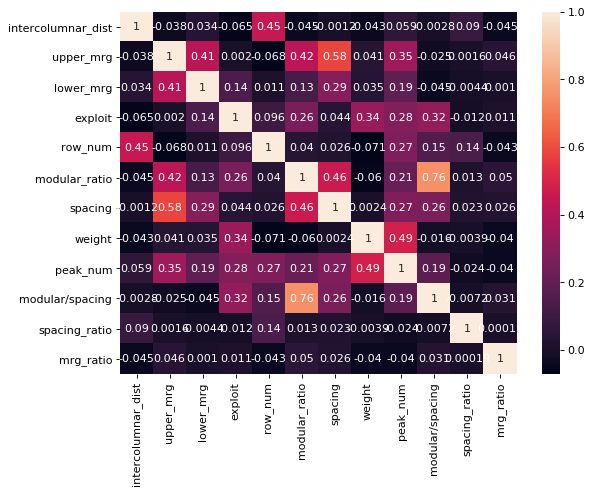

In [134]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
corrMatrix = train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Plot data by their class

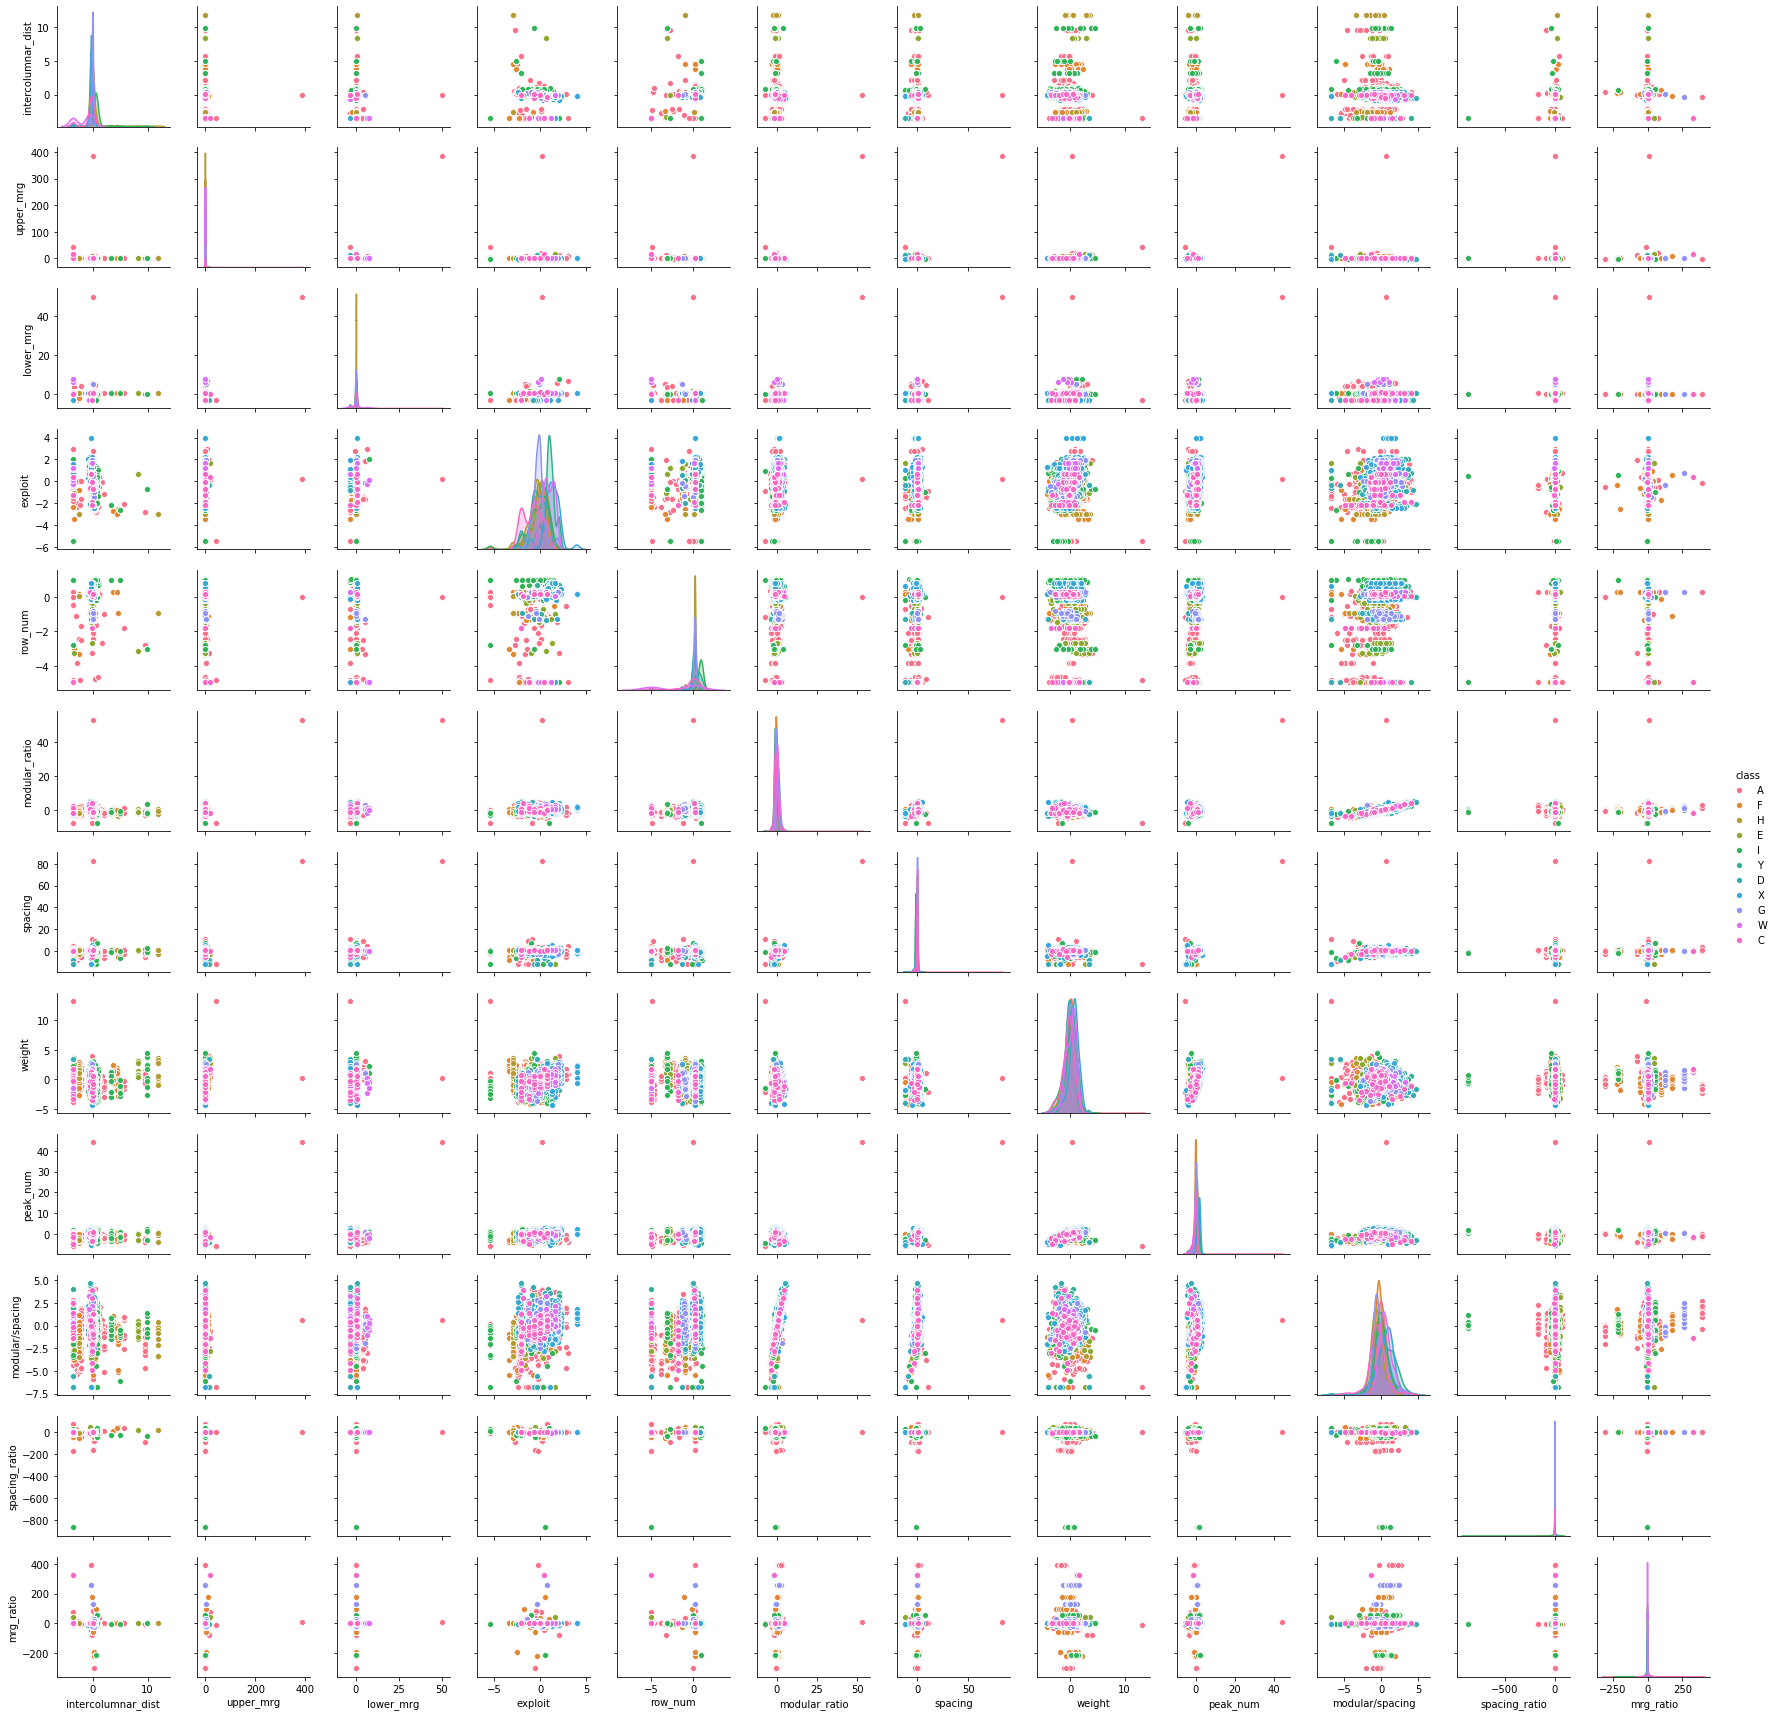

In [15]:
sns.pairplot(train[train['class'] != 'B'], hue='class', height=2) # Remove 5 lines with B to avoid "Error : Singularity matrix" Cf : https://stackoverflow.com/questions/40101519/plotting-event-density-in-python-with-ggplot-and-pandas

# Prediction

## Creating train and test datasets

In [49]:
def SplitDataset(df):
    return df.drop('class', axis=1), df['class']

x_train, y_train = SplitDataset(train)
x_test, y_test = SplitDataset(test)

Standardize values

In [50]:
from sklearn.preprocessing import StandardScaler,label_binarize

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)
y_train_multi = label_binarize(y_train, classes=DATASET_CLASS)
y_test_multi = label_binarize(y_test, classes=DATASET_CLASS)

In [51]:
features = train.drop('class', axis=1).columns

Feature Importance

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

def PermutationImportance(clf,x,y):
    results = permutation_importance(clf, x, y, scoring='accuracy')

    # get importance
    importance = results.importances_mean
    
    print('--- Permuted feature importance ---')
    # summarize feature importance
    for i,v in enumerate(importance):
        print(f'Feature: {features[i]}, Score: %.5f' % (v))
    # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

Creating confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score

def ConfusionMatrix(y_test, predictions, title):
    cm = confusion_matrix(y_test, predictions)
    accur = accuracy_score(y_test, predictions)
    
    plt.matshow  (cm)
    plt.ylabel   ('True Label')
    plt.xlabel   ('Predicted Label')
    plt.suptitle ('Confusion matrix (Accuracy of %.2f) for %s'%(accur,title))
    plt.colorbar ()
    plt.show     ()

Creating ROC curve for MultiClass Data

In [45]:
from sklearn.metrics import roc_curve, auc

def RocCurve(y_test, predictions, title):
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot of a ROC curve for the micro-average ROC 
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve of {title}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label= 'ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(DATASET_CLASS[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi class ROC curve of {title}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

## Testing Classification Algorithm

In [35]:
from sklearn.metrics import classification_report

### Logistic Regression

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           A       0.53      0.94      0.68      4286
           B       1.00      1.00      1.00         5
           C       0.33      0.02      0.04       103
           D       0.00      0.00      0.00       353
           E       0.55      0.25      0.34      1095
           F       0.36      0.09      0.15      1962
           G       0.53      0.05      0.10       447
           H       0.47      0.19      0.27       520
           I       0.89      0.91      0.90       832
           W       0.18      0.04      0.07        45
           X       0.76      0.73      0.74       522
           Y       0.72      0.64      0.68       267

    accuracy                           0.57     10437
   macro avg       0.53      0.41      0.41     10437
weighted avg       0.52      0.57      0.49     10437



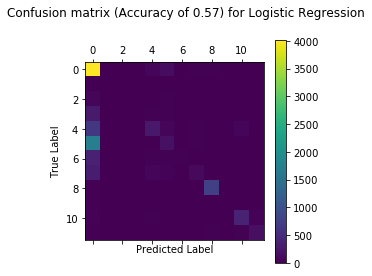

--- Permuted Feature importance ---
Feature: intercolumnar_dist, Score: 0.04656
Feature: upper_mrg, Score: 0.00362
Feature: lower_mrg, Score: 0.00865
Feature: exploit, Score: 0.04213
Feature: row_num, Score: 0.02663
Feature: modular_ratio, Score: 0.14721
Feature: spacing, Score: 0.01971
Feature: weight, Score: 0.03778
Feature: peak_num, Score: 0.12988
Feature: modular/spacing, Score: 0.08385
Feature: spacing_ratio, Score: 0.00265
Feature: mrg_ratio, Score: 0.00251


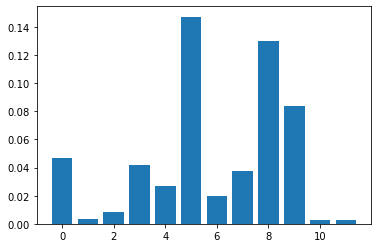

In [40]:
from sklearn.linear_model import LogisticRegression

name = 'Logistic Regression'

clf = LogisticRegression().fit(x_train, y_train)
predictions = clf.predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)
PermutationImportance(clf,x_train,y_train)

### Gradient Boosting

              precision    recall  f1-score   support

           A       0.95      0.98      0.97      4286
           B       1.00      1.00      1.00         5
           C       0.99      1.00      1.00       103
           D       1.00      1.00      1.00       352
           E       0.98      0.98      0.98      1095
           F       0.96      0.91      0.93      1961
           G       1.00      1.00      1.00       446
           H       0.99      0.98      0.99       519
           I       1.00      1.00      1.00       831
           W       1.00      1.00      1.00        44
           X       1.00      0.99      0.99       522
           Y       1.00      1.00      1.00       266

    accuracy                           0.97     10430
   macro avg       0.99      0.99      0.99     10430
weighted avg       0.97      0.97      0.97     10430



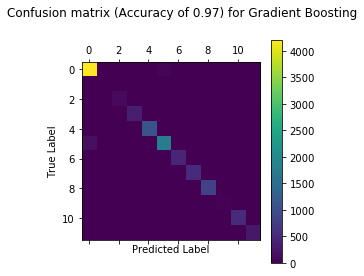

--- Permuted Feature importance ---
Feature: intercolumnar_dist, Score: 0.23248
Feature: upper_mrg, Score: 0.09952
Feature: lower_mrg, Score: 0.13110
Feature: exploit, Score: 0.11856
Feature: row_num, Score: 0.16859
Feature: modular_ratio, Score: 0.01471
Feature: spacing, Score: 0.00698
Feature: weight, Score: 0.00366
Feature: peak_num, Score: 0.06677
Feature: modular/spacing, Score: 0.00188
Feature: spacing_ratio, Score: 0.05137
Feature: mrg_ratio, Score: 0.11337


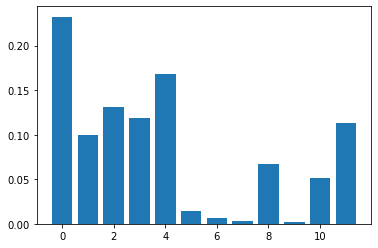

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

name = 'Gradient Boosting'

clf = GradientBoostingClassifier().fit(x_train, y_train)
predictions = clf.predict(x_test)


print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)
PermutationImportance(clf,x_train,y_train)

### K-Nearest Neighbour (KNN)

              precision    recall  f1-score   support

           A       0.81      0.92      0.86      4286
           B       0.83      1.00      0.91         5
           C       0.87      0.52      0.65       103
           D       0.80      0.61      0.69       352
           E       0.83      0.78      0.80      1095
           F       0.79      0.76      0.77      1961
           G       0.84      0.64      0.73       446
           H       0.76      0.63      0.69       519
           I       0.99      0.97      0.98       831
           W       0.97      0.68      0.80        44
           X       0.94      0.84      0.88       522
           Y       0.88      0.77      0.82       266

    accuracy                           0.83     10430
   macro avg       0.86      0.76      0.80     10430
weighted avg       0.83      0.83      0.83     10430



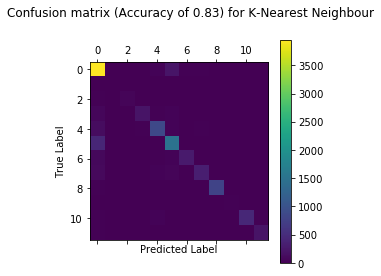

--- Permuted Feature importance ---
Feature: intercolumnar_dist, Score: 0.13291
Feature: upper_mrg, Score: 0.01233
Feature: lower_mrg, Score: 0.07618
Feature: exploit, Score: 0.19939
Feature: row_num, Score: 0.09776
Feature: modular_ratio, Score: 0.10940
Feature: spacing, Score: 0.06368
Feature: weight, Score: 0.14560
Feature: peak_num, Score: 0.21613
Feature: modular/spacing, Score: 0.10571
Feature: spacing_ratio, Score: 0.01868
Feature: mrg_ratio, Score: 0.04840


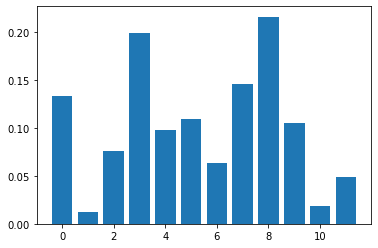

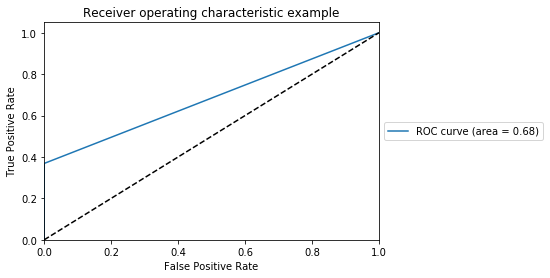

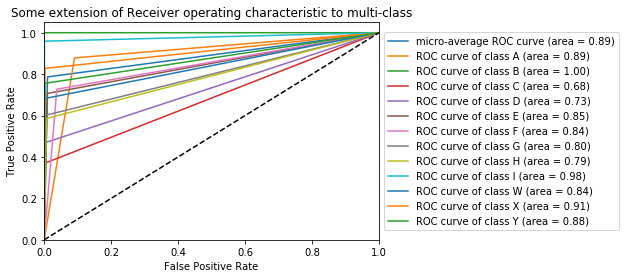

In [169]:
from sklearn.neighbors import KNeighborsClassifier

name = 'K-Nearest Neighbour'

clf = KNeighborsClassifier().fit(x_train, y_train)
predictions = clf.predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)
PermutationImportance(clf,x_train,y_train)

predictions = KNeighborsClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

### Decision Tree

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      4286
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00       103
           D       1.00      1.00      1.00       352
           E       1.00      1.00      1.00      1095
           F       1.00      1.00      1.00      1961
           G       1.00      1.00      1.00       446
           H       1.00      1.00      1.00       519
           I       1.00      1.00      1.00       831
           W       1.00      1.00      1.00        44
           X       1.00      1.00      1.00       522
           Y       1.00      1.00      1.00       266

    accuracy                           1.00     10430
   macro avg       1.00      1.00      1.00     10430
weighted avg       1.00      1.00      1.00     10430



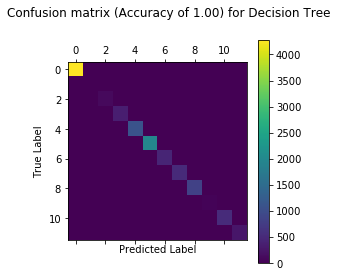

--- Permuted Feature importance ---
Feature: intercolumnar_dist, Score: 0.39229
Feature: upper_mrg, Score: 0.12086
Feature: lower_mrg, Score: 0.26270
Feature: exploit, Score: 0.28090
Feature: row_num, Score: 0.28117
Feature: modular_ratio, Score: 0.01116
Feature: spacing, Score: 0.00642
Feature: weight, Score: 0.00675
Feature: peak_num, Score: 0.07415
Feature: modular/spacing, Score: 0.00539
Feature: spacing_ratio, Score: 0.17032
Feature: mrg_ratio, Score: 0.32462


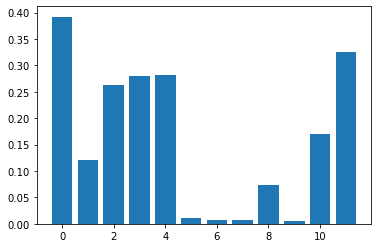

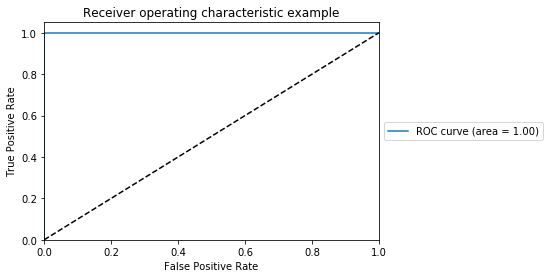

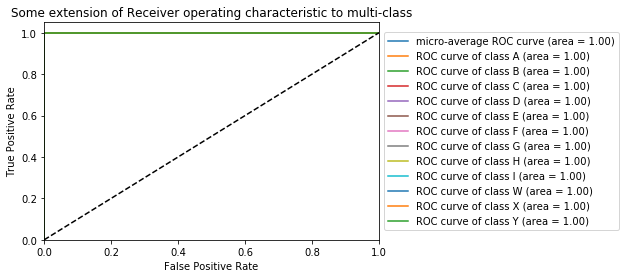

In [170]:
from sklearn.tree import DecisionTreeClassifier

name = 'Decision Tree'

clf = DecisionTreeClassifier().fit(x_train, y_train)
predictions = clf.predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)
PermutationImportance(clf,x_train,y_train)

predictions = DecisionTreeClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

### Random Forest

              precision    recall  f1-score   support

           A       0.99      1.00      1.00      4286
           B       1.00      1.00      1.00         5
           C       0.97      0.99      0.98       103
           D       1.00      0.99      0.99       353
           E       0.99      0.99      0.99      1095
           F       1.00      1.00      1.00      1962
           G       1.00      1.00      1.00       447
           H       1.00      0.98      0.99       520
           I       1.00      1.00      1.00       832
           W       1.00      1.00      1.00        45
           X       1.00      0.98      0.99       522
           Y       1.00      1.00      1.00       267

    accuracy                           1.00     10437
   macro avg       1.00      0.99      0.99     10437
weighted avg       1.00      1.00      1.00     10437



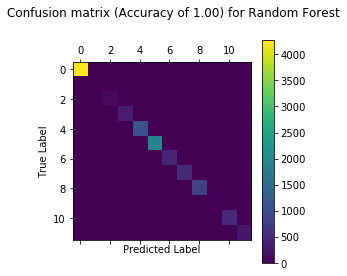

--- Permuted Feature importance ---
Feature: intercolumnar_dist, Score: 0.24644
Feature: upper_mrg, Score: 0.03183
Feature: lower_mrg, Score: 0.09250
Feature: exploit, Score: 0.08919
Feature: row_num, Score: 0.10012
Feature: modular_ratio, Score: 0.00056
Feature: spacing, Score: 0.00148
Feature: weight, Score: 0.00023
Feature: peak_num, Score: 0.05005
Feature: modular/spacing, Score: 0.00013
Feature: spacing_ratio, Score: 0.01319
Feature: mrg_ratio, Score: 0.03735


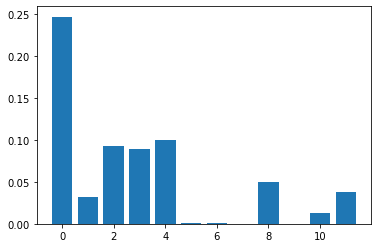

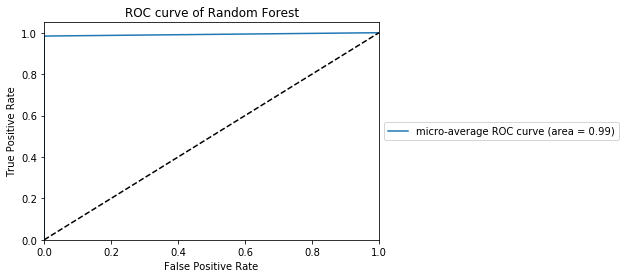

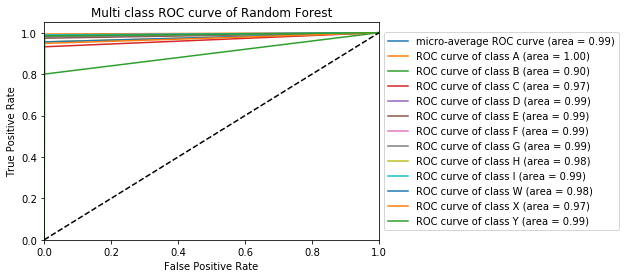

In [46]:
from sklearn.ensemble import RandomForestClassifier

name = 'Random Forest'

clf = RandomForestClassifier().fit(x_train, y_train)
predictions = clf.predict(x_test)

print(classification_report(y_test, predictions))
ConfusionMatrix(y_test, predictions,name)
PermutationImportance(clf,x_train,y_train)

predictions = RandomForestClassifier().fit(x_train, y_train_multi).predict(x_test)
RocCurve(y_test_multi, predictions, name)

## Testing Hyperparameters

In [337]:
from sklearn.model_selection import GridSearchCV

def TestHyperparametres(calssifcationInfo, x_train, y_train):
    grid = GridSearchCV(calssifcationInfo['clf'](), calssifcationInfo['params'], n_jobs=-1)
    grid.fit(x_train, y_train)
    print (grid.best_score_, grid.best_estimator_)    
    return grid.best_score_, grid.best_estimator_

In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

classifcation = {
    "Logistic regression":{
        "clf": LogisticRegression,
        "params": {
            "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "penalty": ['none', 'l1', 'l2', 'elasticnet'],
            "C":[100, 10, 1.0, 0.1, 0.01]
        }
    },
    "K-Nearest Neighbour (KNN)":{
        "clf": KNeighborsClassifier,
        "params":{
            "n_neighbors": range(1,20),
            "metric": ['euclidean', 'manhattan', 'minkowski'],
            "weights": ['uniform', 'distance']
        }
    },
    "Decision tree":{
        "clf": DecisionTreeClassifier,
        "params":{
            "criterion": ['gini','entropy'],
            "max_depth": range(1,10),
            "min_samples_split":range(1,10),
            "min_samples_leaf":range(1,5)
        }
    },
    "Random Forest":{
        "clf": RandomForestClassifier,
        "params":{
            "max_features": range(1,20),
            "n_estimators": [10,100,100]
        }
    },
    "Gradient boosting": {
        "clf": GradientBoostingClassifier,
        "params":{
            "learning_rate":[0.001, 0.01, 0.1],
            "n_estimators": [10,100,100],
            "subsample": [0.5, 0.7, 1.0],
            "max_depth": [3, 7, 9]
        }
    }
}

In [339]:
for name, calssifcationInfo in classifcation.items():
    print(f'----------------- {name} -----------------')
    TestHyperparametres(calssifcationInfo,x_train,y_train)

----------------- Logistic regression -----------------
0.5649074225105517 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
----------------- K-Nearest Neighbour (KNN) -----------------
0.865572331709551 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')
----------------- Decision tree -----------------
0.8243571309241636 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_sa

### Cross Validation of Gradient Boosting

I am probably overfitting here, so I use cross-validation to be sure of my results

In [340]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=9, subsample=0.5, n_estimators=100)
cross_val_score(clf, x_train, y_train, cv=10)

C:\Users\Med\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.9988024 , 0.99640719, 0.9994012 , 0.99940084, 0.99880168,
       0.99940084, 0.99700419, 0.99640503, 0.99640503, 0.99640503])

### Performance visualization

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

bestModel = {
    "Logistic regression": LogisticRegression(C=100, penalty='l2', solver='newton-cg'),
    "K-Nearest Neighbour (KNN)": KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance'),
    "Decision tree": DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=1, min_samples_split=5),
    "Random Forest": RandomForestClassifier(max_features=9, n_estimators=100),
    "Gradient boosting": GradientBoostingClassifier(learning_rate=0.1, max_depth=9, subsample=0.5, n_estimators=100)
}

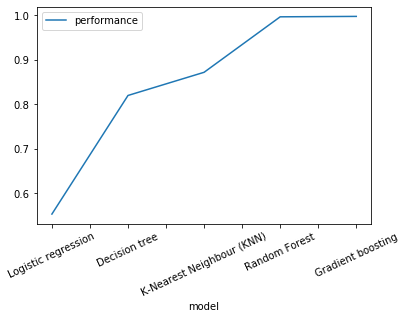

In [375]:
perf = {}
    
for name, clf in bestModel.items():
    clf.fit(x_train, y_train)
    perf[name] = clf.score(x_test, y_test)
    
df = pd.DataFrame(perf.items(),columns=['model','performance'])
df = df.sort_values("performance")
df.plot(rot=25, x="model")

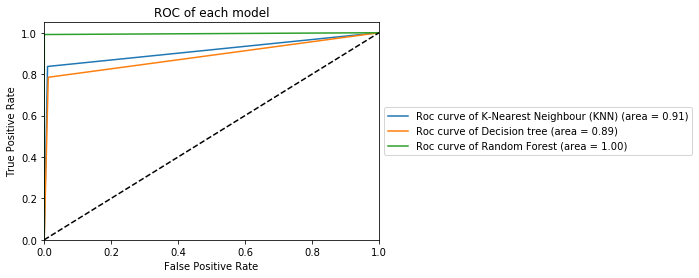

In [71]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curve
plt.figure()   
for name, clf in bestModel.items():
    if name != "Logistic regression" and name != "Gradient boosting":
        predictions = clf.fit(x_train, y_train_multi).predict(x_test)

        # Compute micro-average ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test_multi.ravel(), predictions.ravel())
        roc_auc = auc(fpr, tpr)


        plt.plot(fpr, tpr,
                 label='Roc curve of {0} (area = {1:0.2f})'
                       ''.format(name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of each model')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Save the trained prediction model

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pickle

forest = RandomForestClassifier(max_features=9, n_estimators=100).fit(x_train, y_train)

with open('../api/model.pickle', 'wb') as handle:
    pickle.dump(forest, handle, protocol=pickle.HIGHEST_PROTOCOL)